<a href="https://colab.research.google.com/github/RubenFranc/CDA_Taller2/blob/main/model/PackagesClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/RubenFranc/CDA_Taller2

Cloning into 'CDA_Taller2'...
remote: Enumerating objects: 5390, done.
remote: Counting objects: 100% (1522/1522), done.
remote: Compressing objects: 100% (1487/1487), done.
remote: Total 5390 (delta 35), reused 1491 (delta 24), pack-reused 3868 (from 1)
Receiving objects: 100% (5390/5390), 168.60 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (4962/4962), done.


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
#Numpy y Pandas
import pandas as pd
import numpy as np
from numpy import asarray

#Librerías de Scikit Learn
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Librerías de Keras y Tensor Flow
import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, Rescaling, Lambda, MaxPooling2D, Conv2D, AveragePooling2D, Activation, Reshape
from keras import backend as K
from keras import applications
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

#Gráficos
import matplotlib.pyplot as plt
%matplotlib inline

#Otras Librerías
import os
from PIL import Image
from tqdm import tqdm

#Verificamos las versiones de las librerías
print(f"La versión de sklearn es: {sklearn.__version__}")
print('Tensorflow version:', tf.__version__)

La versión de sklearn es: 1.5.2
Tensorflow version: 2.17.0


In [ ]:
data='CDA_Taller2/model/data/train/Packages'
categories=os.listdir(data)
categories.sort()
categories

['Juice',
 'Milk',
 'Oat-Milk',
 'Oatghurt',
 'Sour-Cream',
 'Sour-Milk',
 'Soy-Milk',
 'Soyghurt',
 'Yoghurt']

In [ ]:
model = Sequential(name="Mi_primer_RNC")

In [ ]:
model.add(Input(shape=(256, 256, 3), batch_size=None, name='Capa_Entrada'))
model.add(Rescaling(1./255, name='Capa_Reescalado'))

model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', name='Capa_Convolucional_1'))
model.add(MaxPooling2D((2, 2), name='Max_Pool_1'))
model.add(Conv2D(128, (3, 3), activation='relu', name='Capa_Convolucional_2'))
model.add(AveragePooling2D((2, 2), name='Avg_Pool_1'))
model.add(Conv2D(256, (3, 3), activation='relu', name='Capa_Convolucional_3'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,816 (1.41 MB)

 Trainable params: 370,816 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Flatten(name='Flatten_Layer'))
model.add(Dense(128,activation='relu',name='Capa_Densa_1'))
model.add(Dense(64,activation='relu',name='Capa_Densa_2'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,344,000 (451.45 MB)

 Trainable params: 118,344,000 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Dense(len(categories), activation='softmax', name='Capa_Respuesta'))
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Respuesta (Dense)               │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,344,585 (451.45 MB)

 Trainable params: 118,344,585 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "Mi_primer_RNC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Capa_Reescalado (Rescaling)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_1 (Conv2D)        │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_Pool_1 (MaxPooling2D)            │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_2 (Conv2D)        │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Avg_Pool_1 (AveragePooling2D)        │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Convolucional_3 (Conv2D)        │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 921600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_1 (Dense)                 │ (None, 128)                 │     117,964,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Densa_2 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_Respuesta (Dense)               │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,344,585 (451.45 MB)

 Trainable params: 118,344,585 (451.45 MB)

 Non-trainable params: 0 (0.00 B)

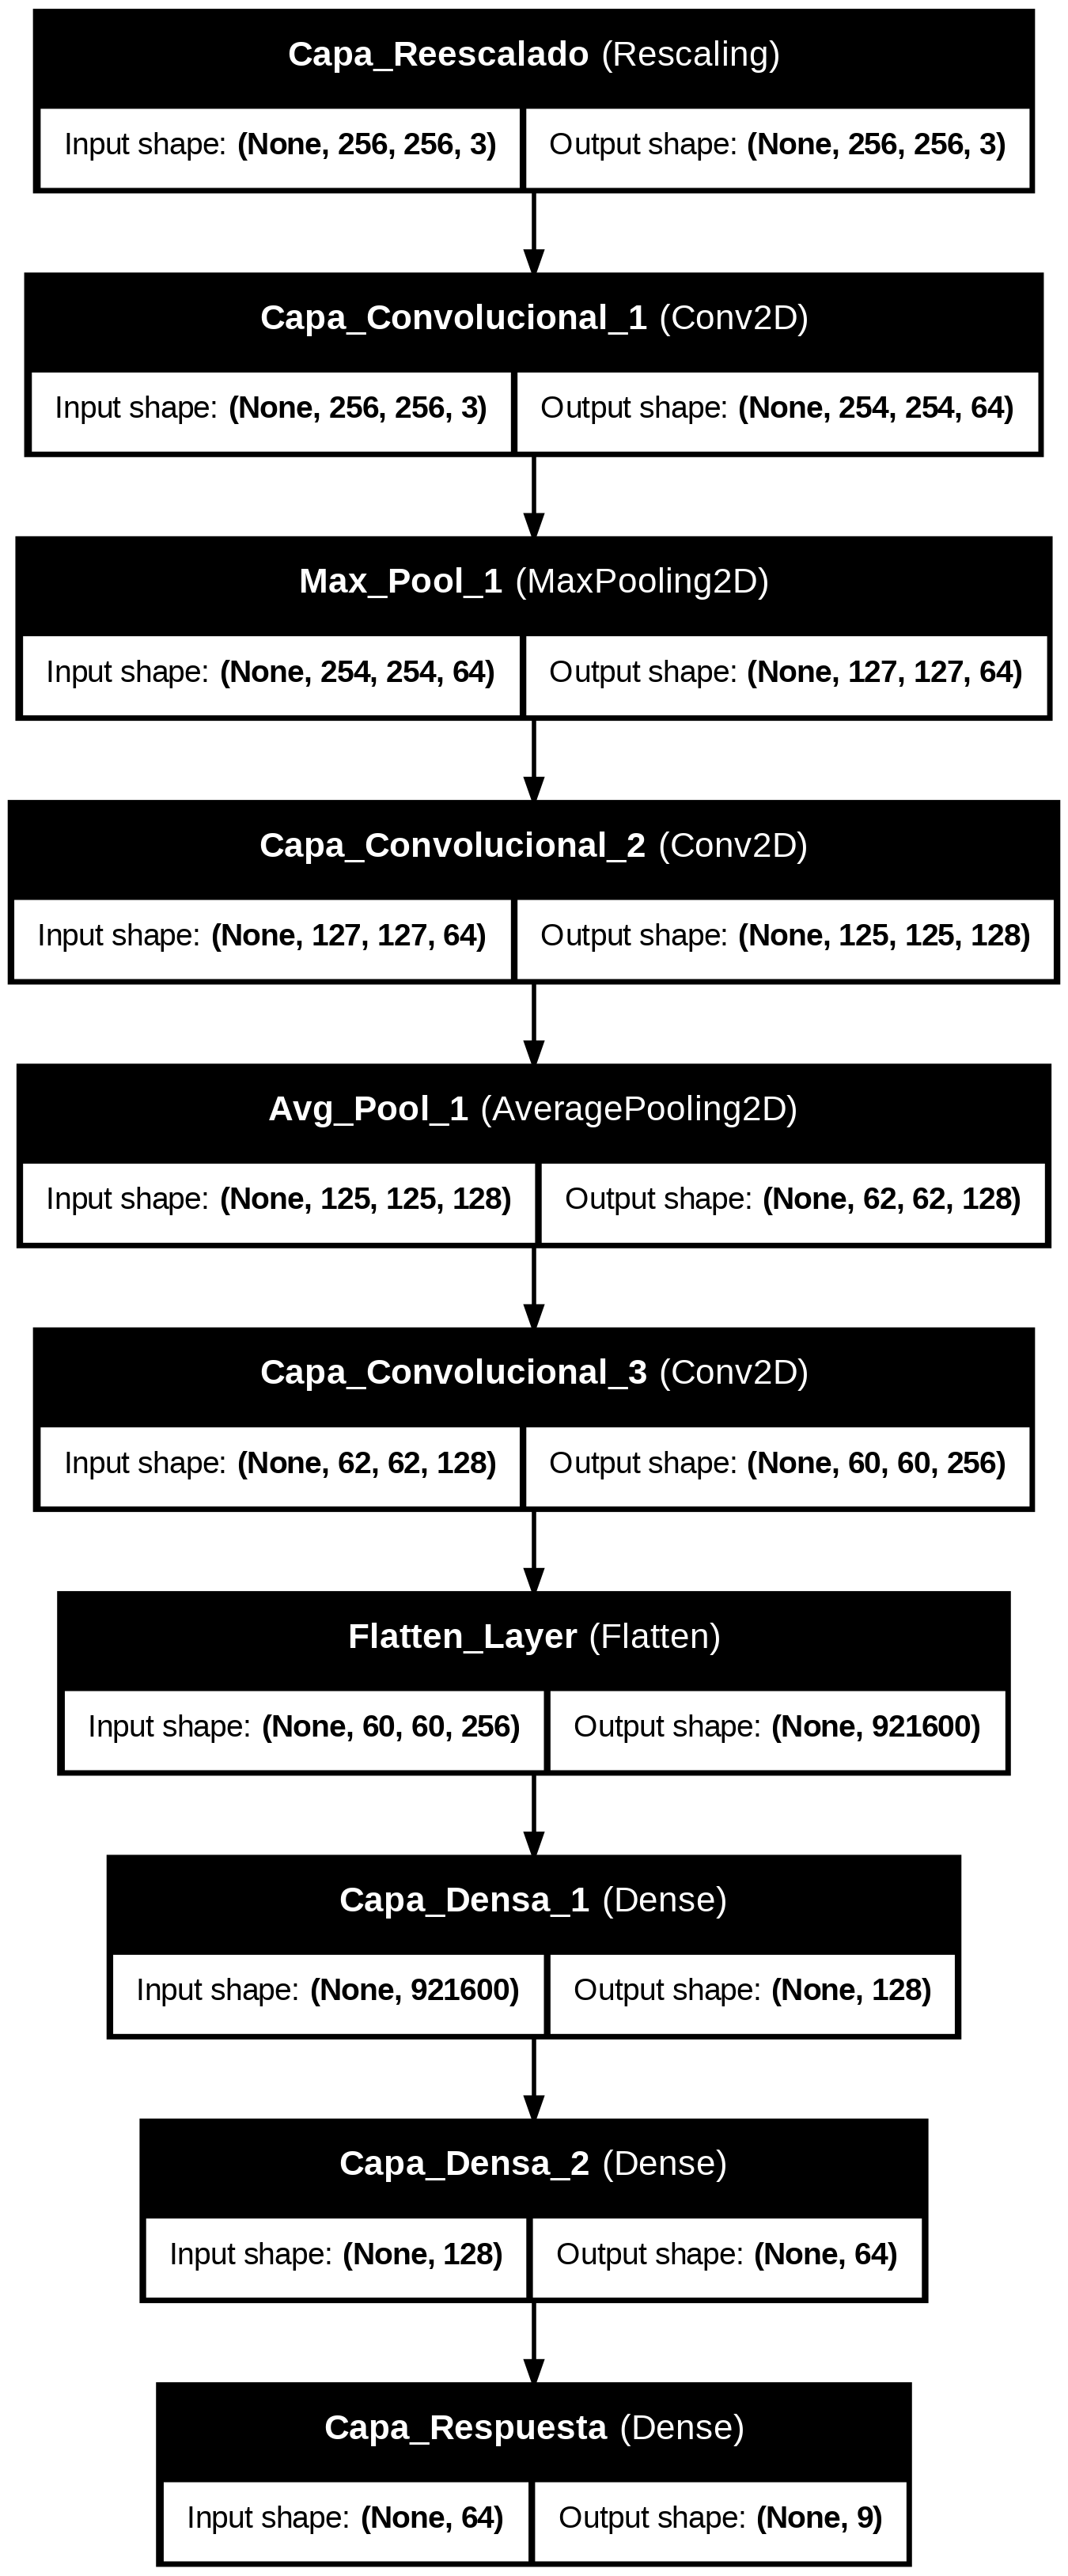

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3)
]

In [ ]:
device_name = tf.test.gpu_device_name()
gpu_name = '/device:GPU:0'
if device_name != gpu_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/train/Packages',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 620 files belonging to 9 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/test/Packages',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 583 files belonging to 9 classes.


In [ ]:
with tf.device(gpu_name):
  history = model.fit(train_ds,
          validation_data=test_ds,
          epochs=10
  )

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 997ms/step - loss: 3.7966 - precision: 0.1575 - recall: 0.0534 - val_loss: 1.9495 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 1.8780 - precision: 0.3699 - recall: 0.0343 - val_loss: 1.6411 - val_precision: 0.4725 - val_recall: 0.2950
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 1.2116 - precision: 0.7131 - recall: 0.3914 - val_loss: 1.2808 - val_precision: 0.6630 - val_recall: 0.4117
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.5649 - precision: 0.8884 - recall: 0.7114 - val_loss: 1.2980 - val_precision: 0.6557 - val_recall: 0.5815
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 0.2159 - precision: 0.9662 - recall: 0.9085 - val_loss: 1.6252 - val_precision: 0.6480 - val_recall: 0.5969
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0820 - precision: 0.9897 - recall: 0.9754 - val_loss: 2.8534 - val_precision: 0.5401 - va

In [ ]:
y_true = list()
y_pred = list()

for images, labels in train_ds:
    pred = model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] == pred[i].max()).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

              precision    recall  f1-score   support

       Juice       0.97      1.00      0.99       176
        Milk       0.98      1.00      0.99        64
    Oat-Milk       0.94      1.00      0.97        32
    Oatghurt       0.97      1.00      0.99        33
  Sour-Cream       0.95      1.00      0.97        19
   Sour-Milk       1.00      1.00      1.00        30
    Soy-Milk       1.00      1.00      1.00        60
    Soyghurt       0.98      1.00      0.99        51
     Yoghurt       1.00      0.93      0.96       155

   micro avg       0.98      0.98      0.98       620
   macro avg       0.98      0.99      0.98       620
weighted avg       0.98      0.98      0.98       620
 samples avg       0.98      0.98      0.98       620



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


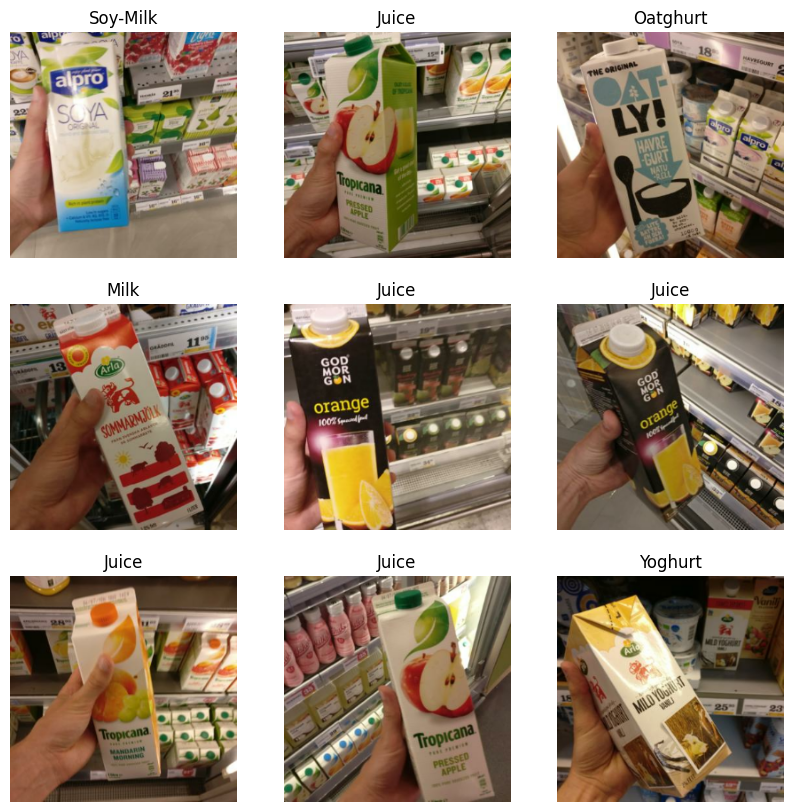

In [ ]:
plt.figure(figsize=(10, 10))

df = train_ds.take(1)
for images, labels in df:
  pred = model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")


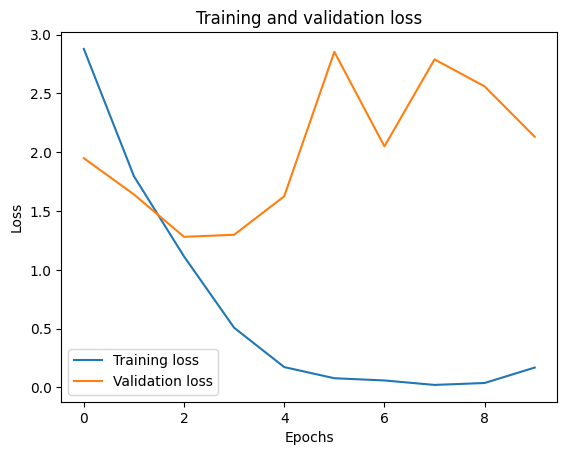

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

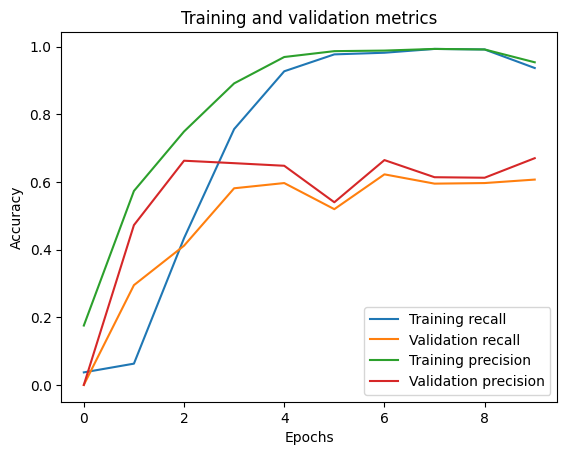

In [ ]:
plt.plot(history.history['recall'], label='Training recall')
plt.plot(history.history['val_recall'], label='Validation recall')
plt.plot(history.history['precision'], label='Training precision')
plt.plot(history.history['val_precision'], label='Validation precision')
plt.title('Training and validation metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_true = list()
y_pred = list()

for images, labels in test_ds:
    pred = model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] == pred[i].max()).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=list(categories)))

              precision    recall  f1-score   support

       Juice       0.68      0.83      0.75       167
        Milk       0.59      0.62      0.61        64
    Oat-Milk       0.45      0.68      0.54        31
    Oatghurt       0.22      0.17      0.19        30
  Sour-Cream       0.60      0.33      0.43        18
   Sour-Milk       0.38      0.26      0.31        19
    Soy-Milk       0.77      0.71      0.74        58
    Soyghurt       0.58      0.68      0.63        47
     Yoghurt       0.70      0.52      0.60       149

   micro avg       0.63      0.63      0.63       583
   macro avg       0.55      0.53      0.53       583
weighted avg       0.63      0.63      0.62       583
 samples avg       0.63      0.63      0.63       583



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


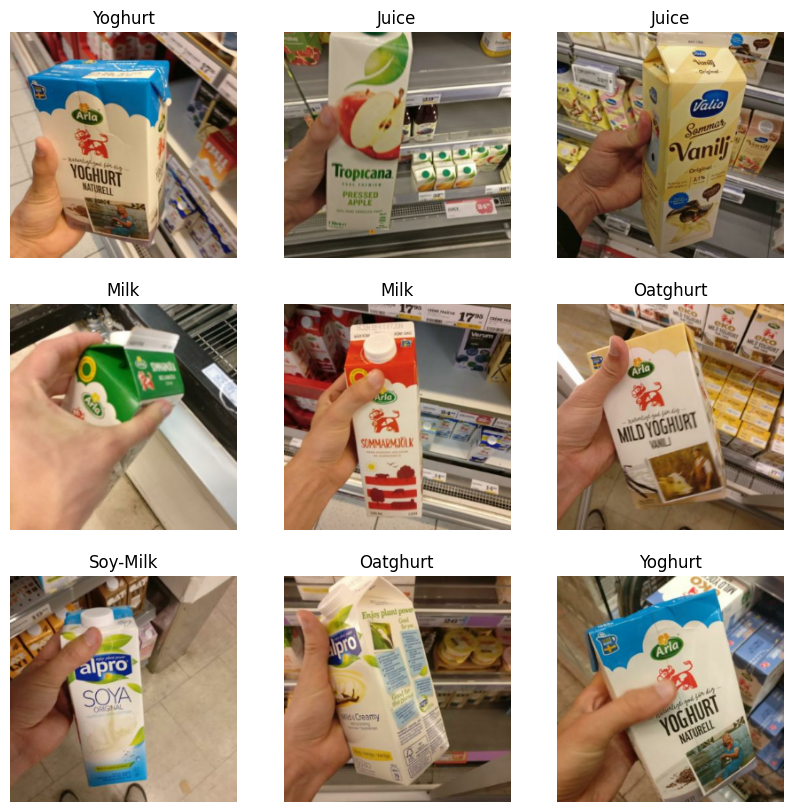

In [ ]:
plt.figure(figsize=(10, 10))

df = test_ds.take(1)
for images, labels in df:
  pred = model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")

In [ ]:
def construirMejorModelo(hip):
  bModel = Sequential(name="Modelo_Simple")

  # Entrada
  bModel.add(Input(shape=(256, 256, 3), name='Entrada'))

  # Reescalado
  bModel.add(Rescaling(1./255, name='Reescalado'))

  # Capas Convolucionales y de Pooling
  bModel.add(Conv2D(filters=hip.Int('conv_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hip.Choice('conv_kernel', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_1'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_1'))

  bModel.add(Conv2D(filters=hip.Int('conv_filters_2', min_value=64, max_value=256, step=64),
                     kernel_size=hip.Choice('conv_kernel_2', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_2'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_2'))

  bModel.add(Conv2D(filters=hip.Int('conv_filters_3', min_value=32, max_value=128, step=32),
                     kernel_size=hip.Choice('conv_kernel_3', values=[3, 5]),
                     activation='relu',
                     name='Convolucional_3'))

  bModel.add(MaxPooling2D((2, 2), name='MaxPooling_3'))

  # Capas Densas
  bModel.add(Flatten(name='Flatten'))
  bModel.add(Dense(units=hip.Int('dense_units', min_value=64, max_value=128, step=64),
                    activation='relu', name='Densa'))
  bModel.add(Dense(9, activation='softmax', name='Salida'))

  # Compilación del modelo
  bModel.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=["accuracy"])

  return bModel

In [ ]:
tuner = kt.RandomSearch(
    construirMejorModelo,
    objective="val_accuracy",
    project_name="cls_packages",
    seed=82,
    max_trials=10)

In [ ]:
with tf.device(gpu_name):
  tuner.search(train_ds, validation_data=test_ds, epochs=10)

Trial 10 Complete [00h 01m 51s]
val_accuracy: 0.583190381526947

Best val_accuracy So Far: 0.6809605360031128
Total elapsed time: 00h 16m 27s


In [ ]:
best_model=tuner.get_best_models()[0]
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'conv_filters': 32,
 'conv_kernel': 3,
 'conv_filters_2': 64,
 'conv_kernel_2': 3,
 'conv_filters_3': 128,
 'conv_kernel_3': 5,
 'dense_units': 128}

In [ ]:
y_true = list()
y_pred = list()

for images, labels in train_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

              precision    recall  f1-score   support

       Juice       1.00      0.98      0.99       176
        Milk       0.96      1.00      0.98        64
    Oat-Milk       1.00      1.00      1.00        32
    Oatghurt       1.00      1.00      1.00        33
  Sour-Cream       1.00      1.00      1.00        19
   Sour-Milk       1.00      1.00      1.00        30
    Soy-Milk       1.00      1.00      1.00        60
    Soyghurt       1.00      1.00      1.00        51
     Yoghurt       0.99      1.00      1.00       155

   micro avg       0.99      0.99      0.99       620
   macro avg       0.99      1.00      1.00       620
weighted avg       0.99      0.99      0.99       620
 samples avg       0.99      0.99      0.99       620



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


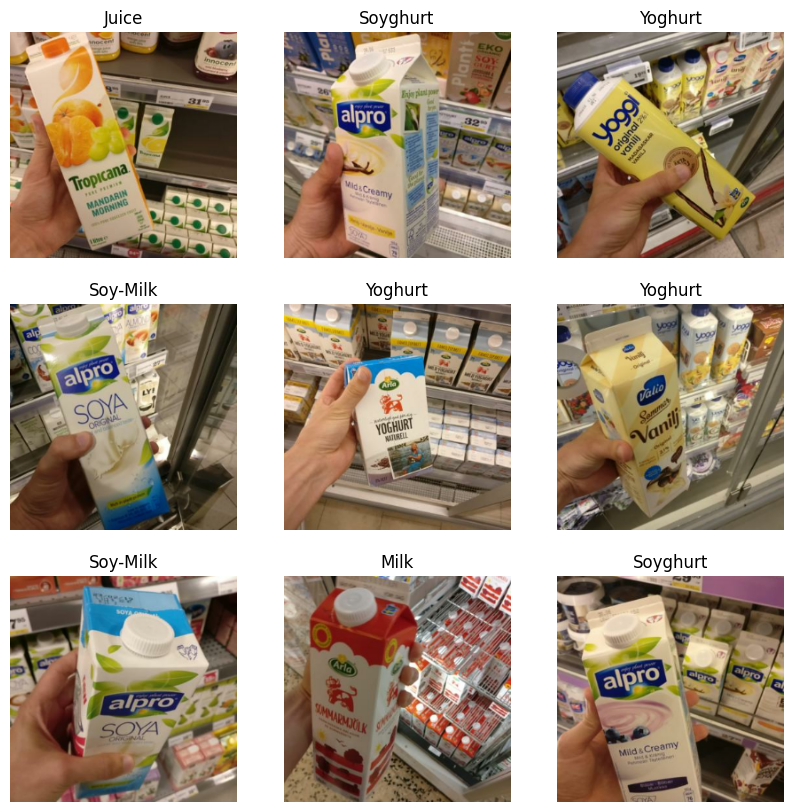

In [ ]:
plt.figure(figsize=(10, 10))

df = train_ds.take(1)
for images, labels in df:
  pred = best_model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[tf.argmax(pred[i]).numpy()])
    plt.axis("off")

In [ ]:
y_true = list()
y_pred = list()

for images, labels in test_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        y_true.append(labels[i].numpy())
        y_pred.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


In [ ]:
print(classification_report(y_true,y_pred,target_names=list(categories)))

              precision    recall  f1-score   support

       Juice       0.76      0.72      0.74       167
        Milk       0.51      0.84      0.64        64
    Oat-Milk       0.47      0.74      0.57        31
    Oatghurt       0.55      0.20      0.29        30
  Sour-Cream       0.00      0.00      0.00        18
   Sour-Milk       0.54      0.68      0.60        19
    Soy-Milk       0.89      0.69      0.78        58
    Soyghurt       0.81      0.64      0.71        47
     Yoghurt       0.74      0.71      0.73       149

   micro avg       0.69      0.67      0.68       583
   macro avg       0.59      0.58      0.56       583
weighted avg       0.69      0.67      0.67       583
 samples avg       0.67      0.67      0.67       583



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Guarda el modelo
best_model.save("cls_paquete_.h5")
best_model.summary()

Model: "Modelo_Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Reescalado (Rescaling)               │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_1 (Conv2D)             │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_1 (MaxPooling2D)          │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_2 (Conv2D)             │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_2 (MaxPooling2D)          │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucional_3 (Conv2D)             │ (None, 58, 58, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_3 (MaxPooling2D)          │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Densa (Dense)                        │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Salida (Dense)                       │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,004,553 (53.42 MB)

 Trainable params: 14,004,553 (53.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import files

# Guardar el archivo (si aún no lo has hecho)
# model.save("modelo.h5")

# Descargar el archivo
files.download("cls_paquete_.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from tensorflow.keras.models import load_model
#modelo = load_model('/content/CDA_Taller2/model/model/trained_models/cls_paquete_.h5')

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'CDA_Taller2/model/data/val/Packages',
  label_mode='categorical',
  seed=82,
  image_size=(256, 256),
  batch_size=32
)

Found 73 files belonging to 7 classes.


In [ ]:
val_data='CDA_Taller2/model/data/val/Packages'
val_categories=os.listdir(val_data)
val_categories.sort()
val_categories

['Juice', 'Milk', 'Oat-Milk', 'Oatghurt', 'Sour-Cream', 'Soyghurt', 'Yoghurt']

In [ ]:
categories

['Juice',
 'Milk',
 'Oat-Milk',
 'Oatghurt',
 'Sour-Cream',
 'Sour-Milk',
 'Soy-Milk',
 'Soyghurt',
 'Yoghurt']

In [ ]:
y_true_train = list()
y_pred_train = list()

for images, labels in train_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        if len(labels[i])<len(categories):
          n=list(labels[i][:5])+[0,0]+list(labels[i][5:])
        else:
          n=labels[i]
        y_true_train.append(np.array(n))
        y_pred_train.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)

y_true_test = list()
y_pred_test = list()

for images, labels in test_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        if len(labels[i])<len(categories):
          n=list(labels[i][:5])+[0,0]+list(labels[i][5:])
        else:
          n=labels[i]
        y_true_test.append(np.array(n))
        y_pred_test.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

y_true_val = list()
y_pred_val = list()

for images, labels in val_ds:
    pred = best_model.predict(images)
    for i in range(len(pred)):
        if len(labels[i])<len(categories):
          n=list(labels[i][:5])+[0,0]+list(labels[i][5:])
        else:
          n=labels[i]
        y_true_val.append(np.array(n))
        y_pred_val.append((pred[i] > 0.5).astype(int))  # Convertir a 1 si la probabilidad es mayor a 0.5, 0 en caso contrario

y_true_val = np.array(y_true_val)
y_pred_val = np.array(y_pred_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [ ]:
predicciones_correctas_train=0
for i in range(len(y_true_train)):
  iguales=True
  for j in range(9):
    if y_true_train[i][j]!=y_pred_train[i][j]:
      iguales=False
  if iguales==True:
    predicciones_correctas_train+=1
print("Precisión train: {} %".format(100*predicciones_correctas_train/len(y_true_train)))

predicciones_correctas_test=0
for i in range(len(y_true_test)):
  iguales=True
  for j in range(9):
    if y_true_test[i][j]!=y_pred_test[i][j]:
      iguales=False
  if iguales==True:
    predicciones_correctas_test+=1
print("Precisión test: {} %".format(100*predicciones_correctas_test/len(y_true_test)))

predicciones_correctas_val=0
for i in range(len(y_true_val)):
  iguales=True
  for j in range(9):
    if y_true_val[i][j]!=y_pred_val[i][j]:
      iguales=False
  if iguales==True:
    predicciones_correctas_val+=1
print("Precisión val: {} %".format(100*predicciones_correctas_val/len(y_true_val)))

Precisión train: 99.35483870967742 %
Precisión test: 67.23842195540308 %
Precisión val: 47.945205479452056 %
